### Credit Risk Modeling 

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Overview</strong>

*Credit Risk Definition: The likelihood that a borrower will not repay their loan.*

Expected Loss ( amount the firm loss as a result of loan default )
= PD * EAD * LGD

- Probability of Default (PD) (likelyhood of a client defaulting on a loan)

- Exposure at Default (EAD) (The amount outstanding at the time of default)

- Losss Given Default (LGD) (The ratio of the exposure against any recovery from loss)

This Analysis will focus on propability of default (PD)
    
</div>

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Data Description</strong>

Data Types
- Application Data (Interest Rate, Grade, Amount)
- Behavioural Data (Employment Length, Historical Default, Income)

For the purpose of demonstration, the data I have used is emulating real credit application data.
Open source datasets have been imported from DataCamp. 

Features:
- Income 
- Age 
- Home ownership
- Employment length 
- Loan intent
- Percent Income 
- Loan grade
- Loan amount
- Interest rate 
- Laon status
- Historical default 
- Credit history length
    
</div>

### Data Cleaning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

#### Describe

In [2]:
df = pd.read_csv('credit_data.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [4]:
print(df.shape)

(32581, 12)


In [38]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


#### Missing Data

In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
df.apply(lambda x: (x == 0).sum())

person_age                        0
person_income                     0
person_home_ownership             0
person_emp_length              4105
loan_intent                       0
loan_grade                        0
loan_amnt                         0
loan_int_rate                     0
loan_status                   25473
loan_percent_income               9
cb_person_default_on_file         0
cb_person_cred_hist_length        0
dtype: int64

In [34]:
# Print the top five rows with nulls for employment length
df[df['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [35]:
# Print the top five rows with nulls for employment length
df[df['loan_int_rate'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4


#### Value Counts

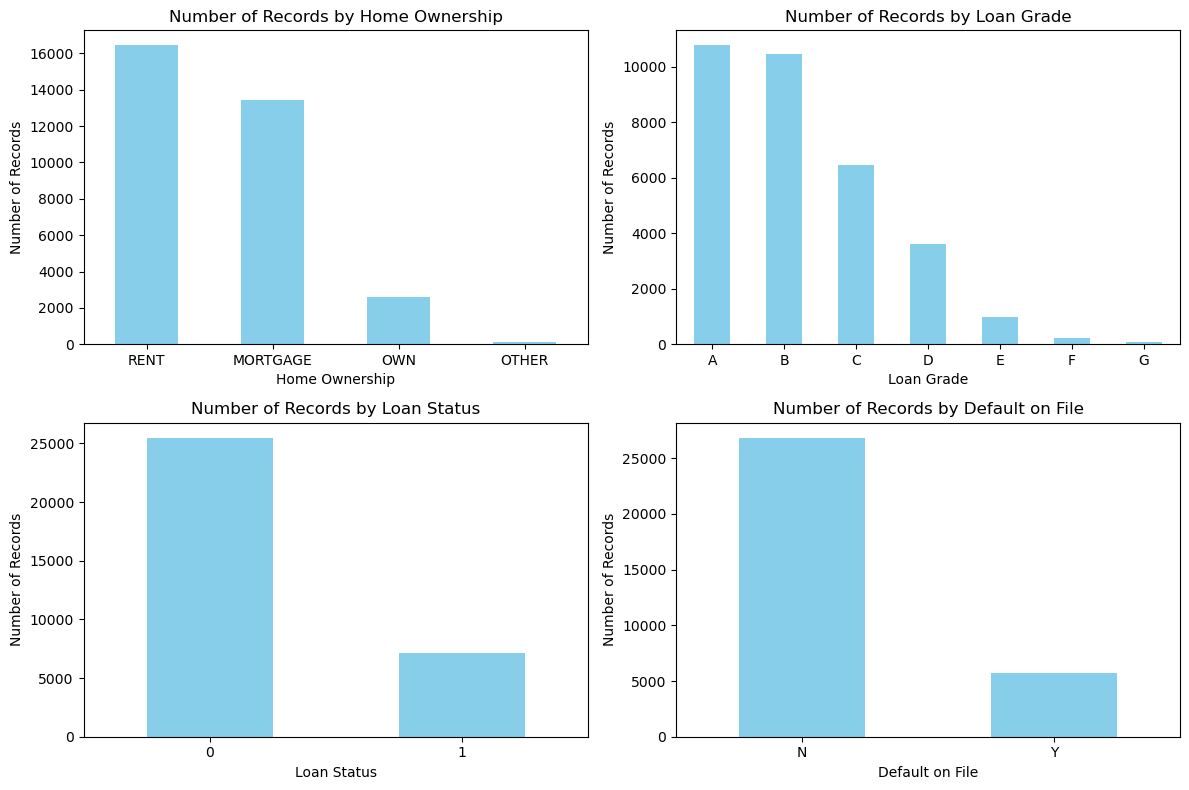

In [48]:
columns = ['person_home_ownership', 'loan_grade', 'loan_status', 'cb_person_default_on_file']
titles = ['Home Ownership', 'Loan Grade', 'Loan Status', 'Default on File']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Number of Records by {titles[i]}')
    axes[i].set_xlabel(titles[i])
    axes[i].set_ylabel('Number of Records')
    axes[i].tick_params(axis='x', rotation=0) 

plt.tight_layout()
plt.show()

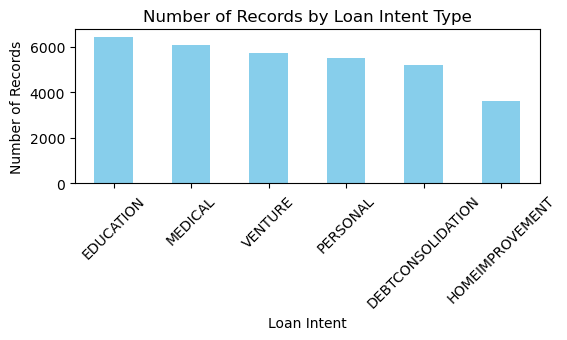

In [43]:
# Unique values in 'loan_intent'
loan_intent_counts = df['loan_intent'].value_counts()
loan_intent_counts.plot(kind='bar', figsize=(6, 2), color='skyblue')

plt.xlabel('Loan Intent')
plt.ylabel('Number of Records')
plt.title('Number of Records by Loan Intent Type')
plt.xticks(rotation=45) 
plt.show()

#### Distributions

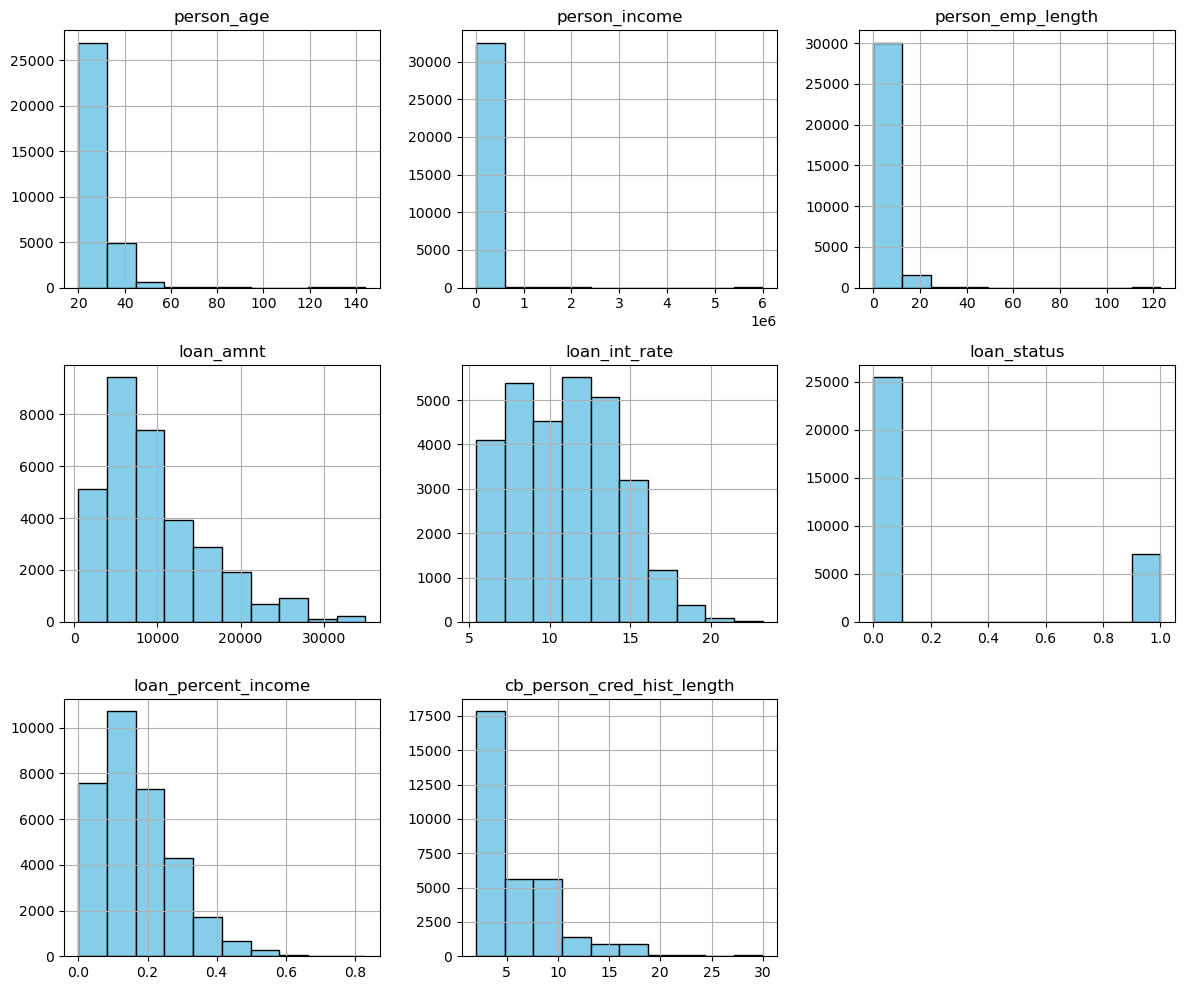

In [50]:
df.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

#### Detecting Outliers

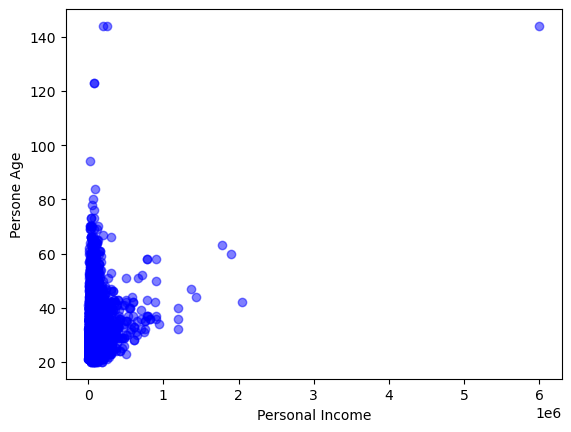

In [64]:
# A scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

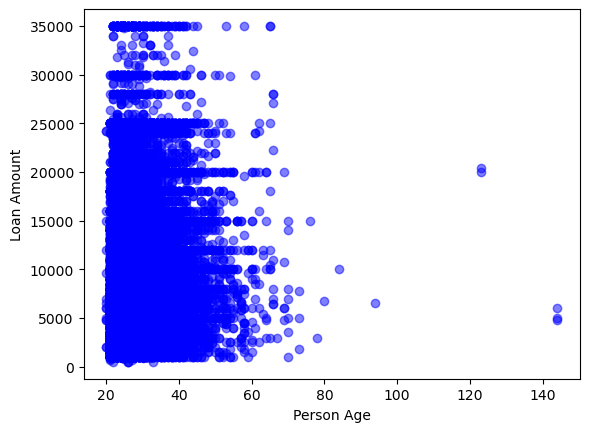

In [65]:
# A scatter plot for age and  loan amount
plt.scatter(df['person_age'], df['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

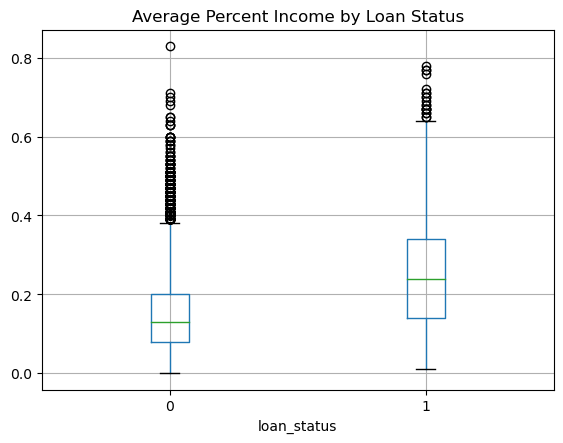

In [12]:
# Create a box plot of percentage income by loan status
df.boxplot(column=['loan_percent_income'], by='loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [66]:
# A cross table of the loan intent and loan status
print(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [10]:
# A cross table of home ownership, loan status, and grade
print(pd.crosstab(df['person_home_ownership'],[df['loan_status'],df['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [11]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(df['person_home_ownership'], df['loan_status'],
              values=df['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


In [15]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(df['loan_status'],df['person_home_ownership'],
        values=df['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


#### Outliers & Missing Data Handling

<div style="border: 1px solid black; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
<strong>Comments:</strong>
    
*Missing Data*

- person_emp_length: With 895 nulls in this feature, I will handle these by imputing the values with the median of all person_emp_length.

- loan_int_rate: 3116 null values in interest rates are usually set by the institution, having missing data in this column is very strange. This could be an ingestion error. Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult. I will remove the rows with no interest rate.


*Outliers*
    
- It is unlikely that employment length is higher than 60, i will drop these rows
- It is unlikely people over 100 years asked for a loan, I will drop these rows   
    
</div>

In [56]:
# Replace the null values with the median value for all employment lengths
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)

# Remove null rows from interest rate of nulls
indices = df[df['loan_int_rate'].isnull()].index
df_clean = df.drop(indices)

# Drop records where 'person_emp_length' is greater than 60
indices = df_clean[df_clean['person_emp_length'] > 60].index
df_clean = df_clean.drop(indices)

# Drop records where 'person_age' is greater than 100
df_new = df_clean.drop(df_clean[df_clean['person_age'] > 100].index)

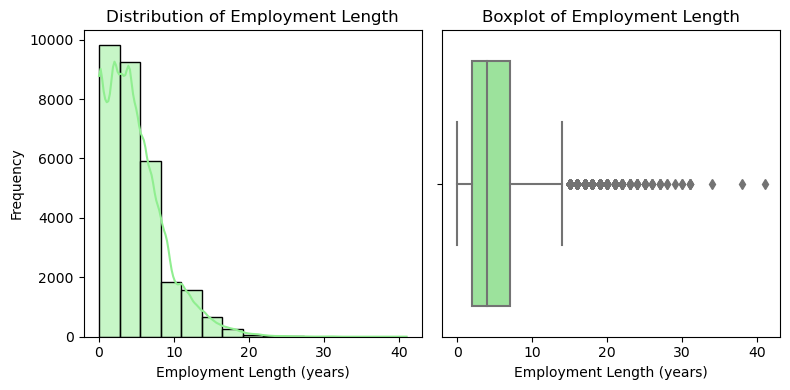

In [63]:
# Set up the figure with subplots for person_emp_length
plt.figure(figsize=(8, 4))

# Histogram for person_emp_length
plt.subplot(1, 2, 1)
sns.histplot(df_new['person_emp_length'].dropna(), bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length (years)')
plt.ylabel('Frequency')

# Boxplot for person_emp_length
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['person_emp_length'], color='lightgreen')
plt.title('Boxplot of Employment Length')
plt.xlabel('Employment Length (years)')

plt.tight_layout()
plt.show()

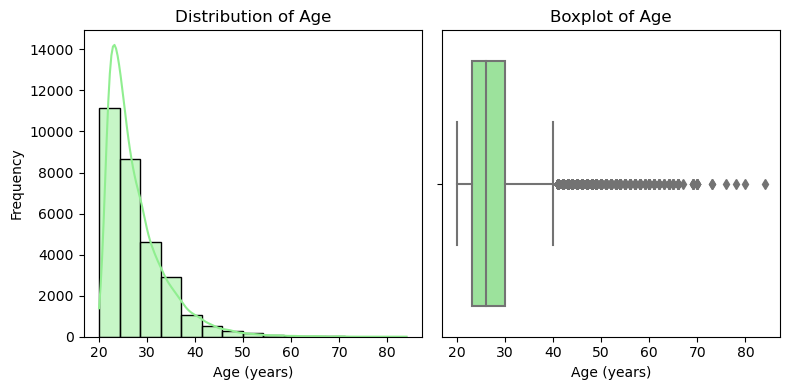

In [62]:
# Set up the figure with subplots for person_age
plt.figure(figsize=(8, 4))

# Histogram for person_age
plt.subplot(1, 2, 1)
sns.histplot(df_new['person_age'].dropna(), bins=15, kde=True, color='lightgreen')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

# Boxplot for person_age
plt.subplot(1, 2, 2)
sns.boxplot(x=df_new['person_age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.xlabel('Age (years)')

# Display the plots
plt.tight_layout()
plt.show()

### Exploratory Data Analysis

#### Distribution Analysis

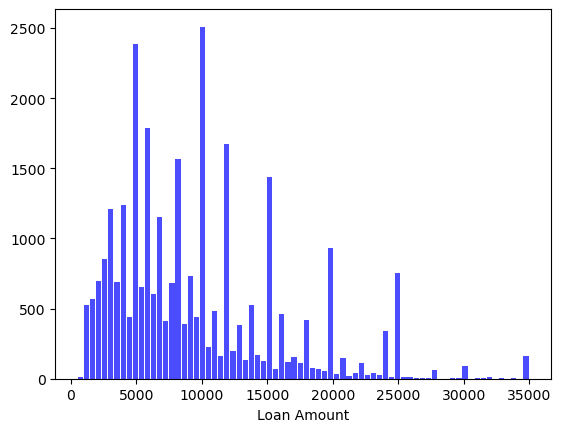

In [67]:
# The distribution of loan amounts
n, bins, patches = plt.hist(x=df_new['loan_amnt'], bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

#### Relationship Analysis

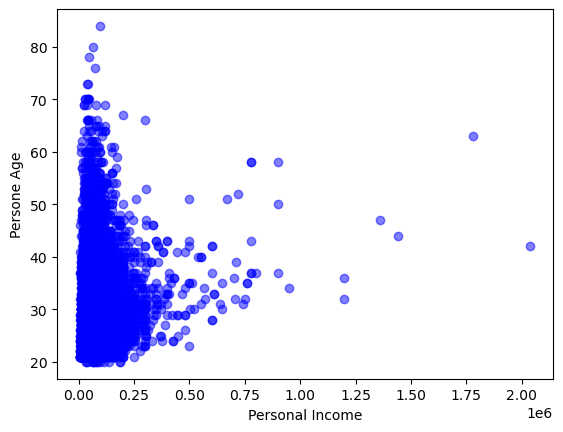

In [68]:
# Plot a scatter plot of income against age
plt.scatter(df_new['person_income'], df_new['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

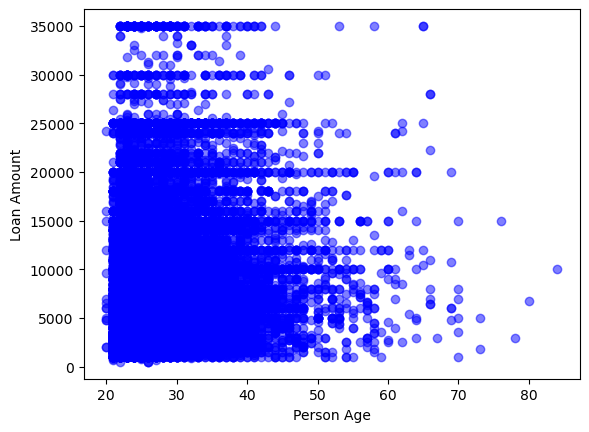

In [69]:
# Create the scatter plot for age and amount
plt.scatter(df_new['person_age'], df_new['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show() 


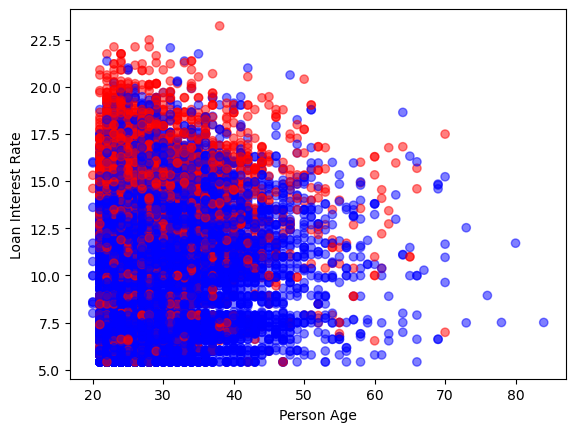

In [71]:
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(df_new['person_age'], df_new['loan_int_rate'],
            c = df_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()